# Project- Machine Learning on Cinema Tickets by Using Random Forcest

This file was obtained from Kaggle and the purpose of this analysis is to understand the content strategy About eight months sales history of different cinemas with detailed data of screening , during 2018 with encoded annonymized locations.





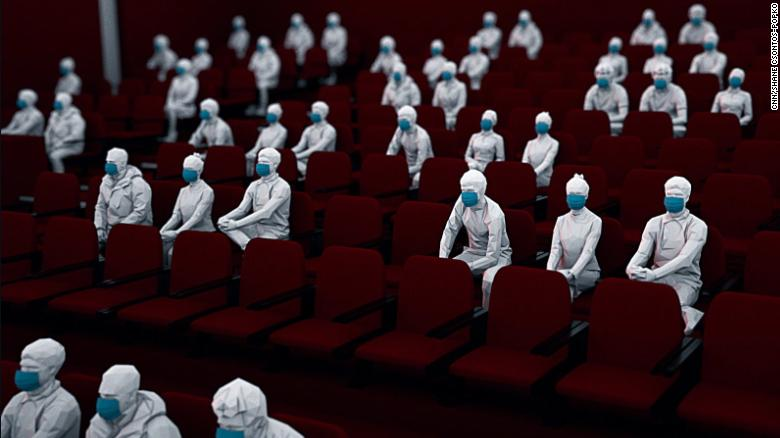

### LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
df=pd.read_csv(r'D:\New folder (2)\cinemaTicket_Ref.csv')
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


### Access the first 5 rows of a dataframe

In [3]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


### Access the last 5 rows of a dataframe

In [4]:
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


### Remove the unwanted columns

In [5]:
df.drop(['show_time','occu_perc','ticket_use','capacity','date','quarter'],inplace=True,axis=1)

In [6]:
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,ticket_price,month,day
0,1492,304,3900000,26,0,150000.0,5,5
1,1492,352,3360000,42,0,80000.0,5,5
2,1492,489,2560000,32,0,80000.0,5,5
3,1492,429,1200000,12,0,100000.0,5,5
4,1492,524,1200000,15,0,80000.0,5,5
...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,60000.0,11,4
142520,1569,474,1200000,15,0,80000.0,11,4
142521,1569,524,1060000,8,0,132500.0,11,4
142522,1569,529,600000,5,0,120000.0,11,4


### Check the shape of DataFrame

In [7]:
df.shape

(142524, 8)

### Prints information about the DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   ticket_price  142524 non-null  float64
 6   month         142524 non-null  int64  
 7   day           142524 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 8.7 MB


### Check the number of missing values in each column

In [9]:
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
ticket_price    0
month           0
day             0
dtype: int64

### Check the datatype of each column

In [12]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
ticket_price    float64
month             int64
day               int64
dtype: object

### Check the duplicated values

In [13]:
df.duplicated().sum()

106

### Drop the all duplicated values

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Check the descriptive statistics 

In [15]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,ticket_price,month,day
count,142418.000000,142418.000000,1.424180e+05,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000
mean,1519.011150,320.388806,1.233589e+07,140.048252,0.237519,81229.345104,6.779663,16.106714
std,36.185319,159.703461,3.063769e+07,279.725269,2.924270,33237.810182,2.194240,8.950213
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,483.870968,2.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,60000.000000,5.000000,8.000000
50%,1498.000000,324.000000,3.710000e+06,50.000000,0.000000,79440.559441,7.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,100000.000000,9.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,700000.000000,11.000000,31.000000


### Convert continuous values to categorical

In [16]:
def total(income):
    if income<5000000:
        return 'low'
    else:
        return 'high'

In [17]:
df['total_sales']=df['total_sales'].apply(total)

In [18]:
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,ticket_price,month,day
0,1492,304,low,26,0,150000.0,5,5
1,1492,352,low,42,0,80000.0,5,5
2,1492,489,low,32,0,80000.0,5,5
3,1492,429,low,12,0,100000.0,5,5
4,1492,524,low,15,0,80000.0,5,5
...,...,...,...,...,...,...,...,...
142519,1569,495,low,22,0,60000.0,11,4
142520,1569,474,low,15,0,80000.0,11,4
142521,1569,524,low,8,0,132500.0,11,4
142522,1569,529,low,5,0,120000.0,11,4


### Creation of a Model
#### Take the X and y value

In [19]:
x=df.drop('total_sales',axis=1)
x

,film_code,cinema_code,tickets_sold,tickets_out,ticket_price,month,day
0,1492,304,26,0,150000.0,5,5
1,1492,352,42,0,80000.0,5,5
2,1492,489,32,0,80000.0,5,5
3,1492,429,12,0,100000.0,5,5
4,1492,524,15,0,80000.0,5,5
...,...,...,...,...,...,...,...
142519,1569,495,22,0,60000.0,11,4
142520,1569,474,15,0,80000.0,11,4
142521,1569,524,8,0,132500.0,11,4
142522,1569,529,5,0,120000.0,11,4


In [20]:
y=df.total_sales
y

0         low
1         low
2         low
3         low
4         low
         ... 
142519    low
142520    low
142521    low
142522    low
142523    low
Name: total_sales, Length: 142418, dtype: object

In [21]:
y.value_counts()

low     81505
high    60913
Name: total_sales, dtype: int64

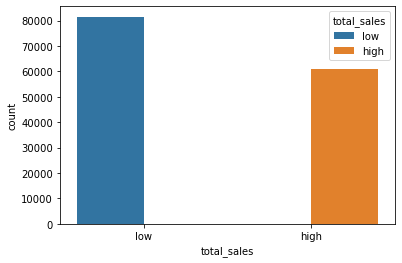

In [22]:
sns.countplot('total_sales',data=df,hue='total_sales')
plt.show()

### Split the Training Dataset and Test Dataset

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier()

### Fitting the training data to the model 

In [27]:
model.fit(x,y)

RandomForestClassifier()

### Prediction

In [28]:
y_predict=model.predict(x_test)

In [29]:
y_predict

array(['low', 'low', 'high', ..., 'low', 'high', 'high'], dtype=object)

### Accuracy

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_predict)*100

100.0

- Overall Accuracy = 100%

### Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
performance=confusion_matrix(y_test,y_predict)

In [34]:
performance

array([[18139,     0],
       [    0, 24587]], dtype=int64)

In [35]:
from sklearn.metrics import plot_confusion_matrix

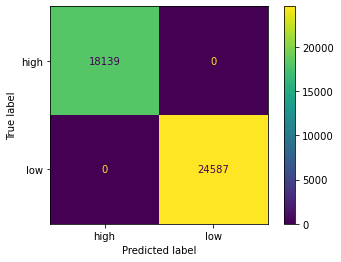

In [37]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

### Analysis of the Result

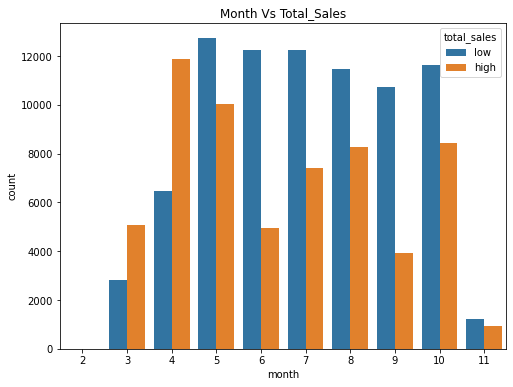

In [40]:
plt.figure(figsize=(8,6))
sns.countplot('month', data=df, hue = 'total_sales')
plt.title("Month Vs Total_Sales")
plt.show()

### Observation
- Total no of highest sale in 4(month).

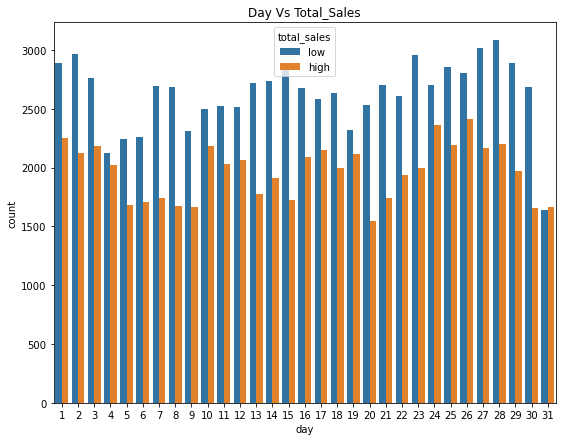

In [42]:
plt.figure(figsize=(9,7))
sns.countplot('day',data=df, hue = 'total_sales')
plt.title("Day Vs Total_Sales")
plt.show()

### Observation
- Total sales highest in 26(day)

### Here is access to the data set & code from my GitHub page
https://www.kaggle.com/datasets/arashnic/cinema-ticket